# Trabalho Prático 1 - Aprendizado de Máquina
#### Giovanna Louzi Bellonia - 2017086015

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import KFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1. Leitura e pré-processamento dos dados

Primeiro foi lido o dataset e imprimido parte dele para uma visão geral dos dados

In [2]:
df = pd.read_csv('koi_data.csv')
df.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


## 1.1 Conversão dos dados
O atributo `koi_disposition` foi transformado de categórico para numérico, com a mudança dos valores que eram `CONFIRMED` para 1 e `FALSE POSITIVE` para -1.

In [3]:
df['koi_disposition'].replace({'CONFIRMED': 1, "FALSE POSITIVE": -1}, inplace=True)
df.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,1,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,-1,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,1,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,-1,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


## 1.2 Atribuição das classes e atributos
As classes que são definidas pela coluna `koi_disposition` foram atribuídas à variável y. Já os atributos, que são os restantes das colunas, foram atribuídas à X. Como o atributo `kepoi_name`, que é apenas o nome dos KOI, não é um atributo que ajude a decidir se o KOI é um exoplaneta ou não, ele foi removido para não ser considerado pelos algoritmos de classificação.

In [4]:
y = df['koi_disposition']
X = df.drop(['kepoi_name', 'koi_disposition'], axis=1)

In [5]:
y

0       1
1       1
2      -1
3       1
4      -1
       ..
5197   -1
5198   -1
5199   -1
5200   -1
5201   -1
Name: koi_disposition, Length: 5202, dtype: int64

In [6]:
X

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,89.66,793.0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,89.57,443.0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,67.09,1395.0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,85.41,1406.0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,60.92,1342.0,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,88.57,206.0,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,85.14,929.0,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,20.78,2088.0,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,88.60,2218.0,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


## 1.3 Normalização dos dados
Foi criado uma variável `X_normalized` que são os atributos de X normalizados. 

In [7]:
y = y.values
X = X.values
X_normalized = preprocessing.normalize(X)

# 2. Preparo para o treinamento dos modelos

## 2.1 Definição do k-fold
Os modelos serão treinados usando validação cruzada k-fold com k igual a 5.

In [8]:
kf = KFold(n_splits=5, shuffle=False)
print("Número de splits:", kf.get_n_splits())

Número de splits: 5


## 2.2 Definição da função padrão para treinamento de um modelo
A função `train_model` treina um modelo passada para ela por parâmetro e retorna as métricas do modelo treinado, sendo essas métricas a acurácia do treino `Train accuracy`, a acurácia da validação `Validation accuracy`, a precisão `Precision` e a revocação `Recall`.

Caso o `printDepth` seja True, a função irá printar a altura da árvore treinada pelo modelo (isso será usado mais para frente para ajudar nos experimentos da Decision Tree).

Caso o `getPrediction` seja True, a função irá retornar os dados necessários para plotar a curva ROC. 

In [9]:
def train_model(model, X, y, printDepth=False, getPrediction=False):
    
    train_accuracy = []
    validation_accuracy = []
    precision = []
    recall = []
    predictions = []
    
    for train_index, validation_index in kf.split(X):
        X_train = X[train_index]
        X_validation = X[validation_index]
        y_train = y[train_index]
        y_validation = y[validation_index]

        #Train the model
        model.fit(X_train, y_train) #Training the model
        
        if(printDepth):
            print(f"Train height: {model.tree_.max_depth}")
        
        #treino
        y_pred = model.predict(X_train)
        train_accuracy.append(accuracy_score(y_train, y_pred))
        
        #validação
        y_pred = model.predict(X_validation)
        
        validation_accuracy.append(accuracy_score(y_validation, y_pred))
        precision.append(precision_score(y_validation, y_pred))
        recall.append(recall_score(y_validation, y_pred))
        
        if getPrediction:
            #predição
            y_prob = model.predict_proba(X[validation_index])
            predictions.extend(y_prob[:,1])
        
    return_metrics = {
        'Train accuracy': np.mean(train_accuracy),
        'Validation accuracy': np.mean(validation_accuracy),
        'Precision': np.mean(precision),
        'Recall': np.mean(recall)
    }
    
    if getPrediction:
        return return_metrics, predictions  
    return return_metrics

## 2.3 Criação da função de plot
A função `plot_accuracy` plota o gráfico de acurácia de treino e de validação para comparação entre diferentes parâmetros que definem métricas diferentes.

In [10]:
def plot_accuracy(metrics, title, xlabel):
    plt_x = metrics.keys()
    plt_train_accuracy = [metric['Train accuracy'] for metric in metrics.values()]
    plt_validation_accuracy  = [metric['Validation accuracy'] for metric in metrics.values()]

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")

    plt.plot(plt_x, plt_train_accuracy, label='Train')
    plt.plot(plt_x, plt_validation_accuracy, label='Validation')

    plt.legend()
    plt.show()

## 2.4 Definição da variável metrics para ajudar nas plotagens

In [11]:
metrics = ['Train accuracy', 'Validation accuracy', 'Precision', 'Recall']

# 3. Experimentos

## 3.1 Naive Bayes
Para o naive bayes foi treinado o modelo usando os atributos X originais e os normalizados. Como esperado, o modelo usando os dados normalizados se saiu melhor na classificação.

In [12]:
naiveBayes = GaussianNB()
naiveBayesMetrics = train_model(naiveBayes, X, y)
print(naiveBayesMetrics)

{'Train accuracy': 0.8000734145963738, 'Validation accuracy': 0.8031251385502106, 'Precision': 0.5518943932875401, 'Recall': 0.9688555756712983}


In [13]:
naiveBayesNormalizedMetrics = train_model(naiveBayes, X_normalized, y)
print(naiveBayesNormalizedMetrics)

{'Train accuracy': 0.9199341127960936, 'Validation accuracy': 0.918295278208823, 'Precision': 0.6893121412912551, 'Recall': 0.8372146267661484}


In [14]:
naiveBayesBestMetrics, naiveBayesBestPrediction = train_model(naiveBayes, X_normalized, y, getPrediction=True)

## 3.2 Decision Tree

### 3.2.1 Altura ilimitada
Para iniciar o processo de experimentação com a árvore de decisão, ou Decision Tree, a sua altura máxima foi determinada como `None`, com isso, a árvore resultante possui todas as folhas puras ou foi impossibilitada de fazer mais splits, sem uma limitação para a altura. 

Para treinar o modelo dessa árvore é passado `True` para o parâmetro `printDepth` da função `train_model` para que possamos saber quais alturas a árvore está atingindo nos treinamentos.

In [15]:
print("Training model with height unlimited")
decisionTree = DecisionTreeClassifier(max_depth=None)
unlimitedTreeMetrics = train_model(decisionTree, X_normalized, y, printDepth=True)

Training model with height unlimited
Train height: 23
Train height: 21
Train height: 25
Train height: 27
Train height: 24


In [16]:
print(unlimitedTreeMetrics)

{'Train accuracy': 1.0, 'Validation accuracy': 0.9300293726446464, 'Precision': 0.7216429735197027, 'Recall': 0.8218832014866184}


### 3.2.2 Altura definida
Já que a altura máxima atingida no treino foi de 27, ao treinar a árvore com a altura máxima definida, foi definido um range de 2 a 27, já que não fará muito sentido buscar uma altura maior que essa.

As métricas de cada árvore resultante do treinamento dos modelos foram guardadas em um dict `tree_metrics`.

In [17]:
tree_metrics = dict()
for h in range(2,27):
    print(f"Training model with height {h}")
    decisionTree = DecisionTreeClassifier(max_depth=h)
    tree_metrics[h] = train_model(decisionTree, X_normalized, y)

print("Training completed!")

Training model with height 2
Training model with height 3
Training model with height 4
Training model with height 5
Training model with height 6
Training model with height 7
Training model with height 8
Training model with height 9
Training model with height 10
Training model with height 11
Training model with height 12
Training model with height 13
Training model with height 14
Training model with height 15
Training model with height 16
Training model with height 17
Training model with height 18
Training model with height 19
Training model with height 20
Training model with height 21
Training model with height 22
Training model with height 23
Training model with height 24
Training model with height 25
Training model with height 26
Training completed!


### 3.2.3 Gráfico das diferentes árvores de decisão
Com as métricas de cada árvore, foi criado um gráfico comparando os valores da acurácia de treino e validação dada as alturas das árvores. 

Perceba que em um momento os valores da acurácia de treino chegam a 1.0, mas as acurácias de validação aumentam até certo ponto e ficam mais ou menos estáveis perto de 0.94. Isso acontece porque a medida que aumentamos a altura da árvore ela vai ficando mais específica, e, assim, vai decorando os dados de treino, de forma a acertá-los sempre. Entretanto, como os dados de treino não representam todos os dados, essa "decoreba" não vai ajudar a ter uma classificação dos dados como um todo. Perceba que inclusive, mesma a validação permanecendo estável, ela aparenta uma tendência de decrescimento bem leve, provavelmente devido a essa alta especificidade do modelo.

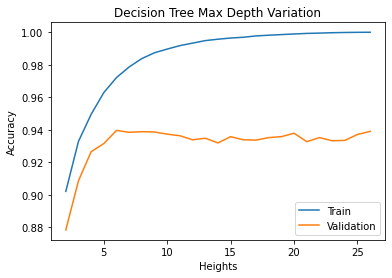

In [18]:
plot_accuracy(tree_metrics, "Decision Tree Max Depth Variation", "Heights")

### 3.2.4 Escolhendo o melhor modelo
Pelo gráfico, podemos perceber que perto da altura 6 ou 7 é quando a árvore atinge o ponto de equilíbrio da validação. Ao printar os valores das métricas dessas duas alturas, podemos ver que na altura 6 a acurácia de validação, a precisão e o recall são um pouco melhores, logo guardaremos esses valores na tabela final dos experimentos. 

In [19]:
print(tree_metrics[6])

{'Train accuracy': 0.9721261973467963, 'Validation accuracy': 0.939641801522205, 'Precision': 0.7342264199465198, 'Recall': 0.8374996638675686}


In [20]:
print(tree_metrics[7])

{'Train accuracy': 0.9786621289817198, 'Validation accuracy': 0.9384868469666741, 'Precision': 0.731988834464622, 'Recall': 0.8268619226320576}


In [21]:
decisionTree = DecisionTreeClassifier(max_depth=6)
decisionTreeBestMetrics, decisionTreeBestPrediction = train_model(decisionTree, X_normalized, y, getPrediction=True)

## 3.3 SVM

### 3.3.1 Treinamento do SVM
Para os experimentos com o SVM (Support Vector Machine) o tipo de kernel variou entre Linear, Sigmoid, Polinomial ou RBF.

In [22]:
svm_metrics = dict()
kernels = ['linear', 'sigmoid', 'poly', 'rbf']
df_svm = pd.DataFrame(index=kernels, columns=metrics)

for k in kernels:
    print(f"Training model with kernel {k}")
    svm = SVC(kernel=k, gamma='auto', probability=True)
    df_svm.loc[k] = train_model(svm, X_normalized, y)
    
print("Training completed!")

Training model with kernel linear
Training model with kernel sigmoid


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model with kernel poly


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

Training model with kernel rbf


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training completed!


### 3.3.2 Escolhendo o melhor modelo
Ao verificarmos as métricas dos modelos treinados pelo SVM podemos perceber que o modelo linear se sai melhor que os outros já que seus valores de acurácia, precisão e recal são maiores. Além disso é interessante perceber que a acurácia do treino e da validação são parecidas, demonstrando que o modelo não está apenas decorando os dados de treino mas realmente aprendendo os dados. 

Por o melhor modelo ser o linear, podemos supor que os dados se aproximam de uma separação linear, mas provavelmente tem alguns outsiders que fazem com que a acurácia e a precisão não seja mais alta como dos modelos treinados até então com os outros algoritmos.

In [23]:
df_svm

,Train accuracy,Validation accuracy,Precision,Recall
linear,0.749327,0.728544,0.522437,0.897743
sigmoid,0.698143,0.494125,0.167379,0.57262
poly,0.597566,0.396433,0.000384615,0.2
rbf,0.70415,0.505471,0.171406,0.563849


In [24]:
svm = SVC(kernel='linear', gamma='auto', probability=True)
svmBestMetrics, svmBestPrediction = train_model(svm, X_normalized, y, getPrediction=True)

## 3.4 k-NN

### 3.4.1 Treinamento do k-NN
Para os experimentos com o k-NN foi variado a quantidade de vizinhos em um range de 1 a 18. Perceba que para k=1, o treino tem acurácia de 1.00, isso já era esperado de acontecer devido a forma como o K-nn funciona, nesse caso teremos um overfit.

In [25]:
knn_metrics = dict()
for k in range(1,18):
    print(f"Training model with k {k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_metrics[k] = train_model(knn, X_normalized, y)

print("Training completed!")

Training model with k 1
Training model with k 2
Training model with k 3
Training model with k 4
Training model with k 5
Training model with k 6
Training model with k 7
Training model with k 8
Training model with k 9
Training model with k 10
Training model with k 11
Training model with k 12
Training model with k 13
Training model with k 14
Training model with k 15
Training model with k 16
Training model with k 17
Training completed!


### 3.4.2 Escolhendo o melhor modelo
Podemos perceber que os valores de treino vão diminuindo, mas os de validação permanecem praticamente constantes. Por isso decidi escolher como modelo final o que possui apenas 2 vizinhos, já que ele será menos complexo.

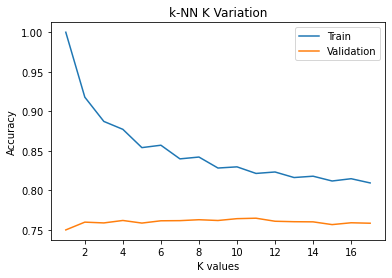

In [26]:
plot_accuracy(knn_metrics, "k-NN K Variation", "K values")

In [27]:
knn = KNeighborsClassifier(n_neighbors=2)
knnBestMetrics, knnBestPrediction = train_model(knn, X_normalized, y, getPrediction=True)

## 3.5 Random Forest

### 3.5.1 Treinamento do Random Forest
Para os experimentos com o Random Forest foi variado a quantidade de árvores no classificador entre 1 e 30 árvores.

In [28]:
rf_metrics = dict()
for n in range(1,30):
    print(f"Training model with {n} trees")
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_metrics[n] = train_model(rf, X_normalized, y)

print("Training completed!")

Training model with 1 trees
Training model with 2 trees
Training model with 3 trees
Training model with 4 trees
Training model with 5 trees
Training model with 6 trees
Training model with 7 trees
Training model with 8 trees
Training model with 9 trees
Training model with 10 trees
Training model with 11 trees
Training model with 12 trees
Training model with 13 trees
Training model with 14 trees
Training model with 15 trees
Training model with 16 trees
Training model with 17 trees
Training model with 18 trees
Training model with 19 trees
Training model with 20 trees
Training model with 21 trees
Training model with 22 trees
Training model with 23 trees
Training model with 24 trees
Training model with 25 trees
Training model with 26 trees
Training model with 27 trees
Training model with 28 trees
Training model with 29 trees
Training completed!


### 3.5.2 Escolhendo o melhor modelo
Podemos perceber que os valores de treino e de validação vão aumentando, mas a validação atinge um ponto constante (apesar de manter um leve crescimento), por isso defini a métrica de 7 árvores como a métrica final, já que é o ponto em que existe um pico no valor da validação mas sem ser um valor muito alto que vai aumentar a capacidade do modelo.

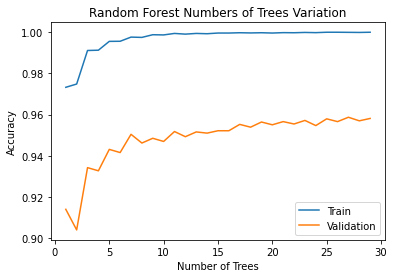

In [29]:
plot_accuracy(rf_metrics, "Random Forest Numbers of Trees Variation", "Number of Trees")

In [30]:
rf = RandomForestClassifier(n_estimators=7, random_state=42)
rfBestMetrics, rfBestPrediction = train_model(rf, X_normalized, y, getPrediction=True)

## 3.6 Gradient Tree Boosting

### 3.6.1 Treinamento do Random Forest
Para os experimentos com o Random Forest foi variado a quantidade de árvores no classificador entre 1 e 30 árvores.

In [31]:
gtb_metrics = dict()
for i in range(1,30):
    print(f"Training model with {i} iterations")
    gtb = GradientBoostingClassifier(n_estimators=i)
    gtb_metrics[i] = train_model(gtb, X_normalized, y)

print("Training completed!")

Training model with 1 iterations


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model with 2 iterations


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model with 3 iterations


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model with 4 iterations
Training model with 5 iterations
Training model with 6 iterations
Training model with 7 iterations
Training model with 8 iterations
Training model with 9 iterations
Training model with 10 iterations
Training model with 11 iterations
Training model with 12 iterations
Training model with 13 iterations
Training model with 14 iterations
Training model with 15 iterations
Training model with 16 iterations
Training model with 17 iterations
Training model with 18 iterations
Training model with 19 iterations
Training model with 20 iterations
Training model with 21 iterations
Training model with 22 iterations
Training model with 23 iterations
Training model with 24 iterations
Training model with 25 iterations
Training model with 26 iterations
Training model with 27 iterations
Training model with 28 iterations
Training model with 29 iterations
Training completed!


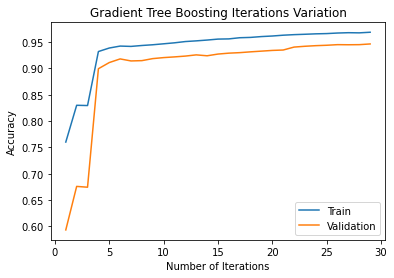

In [32]:
plot_accuracy(gtb_metrics, "Gradient Tree Boosting Iterations Variation", "Number of Iterations")

### 3.6.2 Escolhendo o melhor modelo
Podemos perceber que os valores de validação tem um pico de crescimento a partir das 4 iterações, e depois vai crescendo aos poucos. Pegando o valor da acurácia de validação do modelo com 25 e 7 iterações, vemos que teve uma mudança até considerável de 0.03 na validação, então foi selecionado como melhor modelo o com 25 iterações.

In [33]:
gtb_metrics[25]

{'Train accuracy': 0.9662628113205608,
 'Validation accuracy': 0.9440696815192492,
 'Precision': 0.7538531249623498,
 'Recall': 0.8389867861170653}

In [34]:
gtb_metrics[7]

{'Train accuracy': 0.9418972378119008,
 'Validation accuracy': 0.9142758442326165,
 'Precision': 0.7352378312163681,
 'Recall': 0.8048895486184332}

In [35]:
gtb = GradientBoostingClassifier(n_estimators=25)
gtbBestMetrics, gtbBestPrediction = train_model(gtb, X_normalized, y, getPrediction=True)

# 4. Considerações finais

## 4.1 Tabela de métricas
Através dos melhores valores encontrados para cada algoritmo, geramos a tabela a baixo.

O Random Forest e o Gradient Tree Boosting foram os algoritmos que tiveram melhores valores, isso provavelmente se deve por serem algoritmos mais robustos, já que utilizam de bagging e boosting, que são tipos de ensamble. Neles não se utiliza apenas um modelo, mas se combina vários na expectativa de gerar um modelo final mais interessante.

É interessante de se perceber que o Decision Tree e o Naive Bayes ficaram com valores bem próximos da acurácia de validação dos dois melhores algoritmos apesar de serem algoritmos bem mais simples.É provável que isso tenha acontecido pelo problema ser um problema mais simples.

In [36]:
models = ['Naive Bayes', 'Decision Tree', 'SVM', 'k-NN', 'Random Forest', 'Gradient Tree Boosting']
metrics = ['Train accuracy', 'Validation accuracy', 'Precision', 'Recall']

df_metrics = pd.DataFrame(index=models, columns=metrics)
df_metrics.loc['Naive Bayes'] = naiveBayesBestMetrics
df_metrics.loc['Decision Tree'] = decisionTreeBestMetrics
df_metrics.loc['SVM'] = svmBestMetrics
df_metrics.loc['k-NN'] = knnBestMetrics
df_metrics.loc['Random Forest'] = rfBestMetrics
df_metrics.loc['Gradient Tree Boosting'] = gtbBestMetrics
df_metrics

,Train accuracy,Validation accuracy,Precision,Recall
Naive Bayes,0.919934,0.918295,0.689312,0.837215
Decision Tree,0.972174,0.940026,0.733225,0.838404
SVM,0.749327,0.728544,0.522437,0.897743
k-NN,0.917916,0.759937,0.580819,0.577045
Random Forest,0.997501,0.950409,0.760143,0.835273
Gradient Tree Boosting,0.966263,0.94407,0.753853,0.838987


## 4.2 Curva ROC
As curvas ROC geralmente apresentam taxa de verdadeiro positivo no eixo Y e taxa de falso positivo no eixo X. Isso significa que o canto superior esquerdo do gráfico é o ponto “ideal” - uma taxa de falso positivo de zero e uma taxa de verdadeiro positivo de um. 

Isso não é muito realista, mas significa que uma área maior sob a curva (AUC) geralmente é melhor.

Podemos perceber que a AUC do SVM e do k-NN são os menores, como esperado, já que foram os piores modelos de acordo com a tabela.

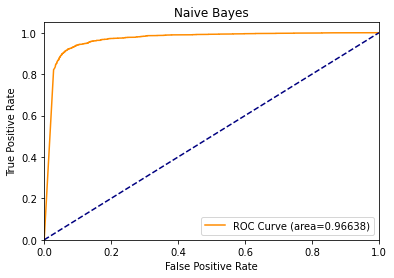

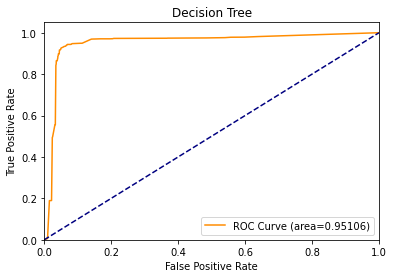

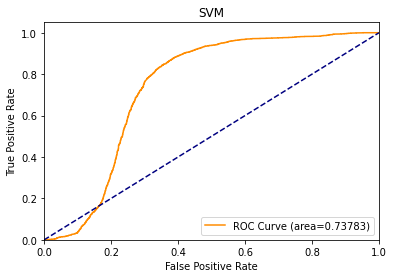

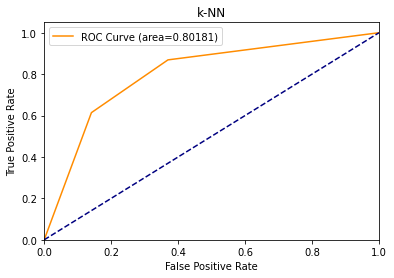

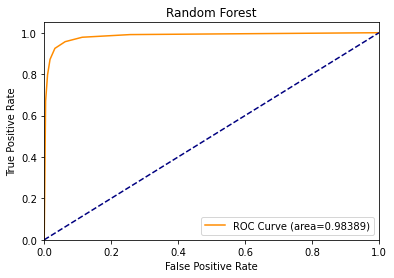

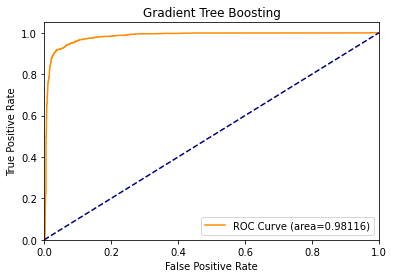

In [37]:
bestModelsPreds = [naiveBayesBestPrediction, decisionTreeBestPrediction, svmBestPrediction, knnBestPrediction, rfBestPrediction, 
                   gtbBestPrediction]

for name, pred in zip(models, bestModelsPreds):    
    # Calculando taxa de false positives, true positives e área sob curva
    fpr, tpr, _ = roc_curve(y, pred)
    AUC = auc(fpr, tpr)
    
    # Plotando curva ROC
    plt.figure()
    plt.title(name)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (area=%0.5f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    plt.legend()
    plt.show()